In [1]:
#Downloaded and saved the data locally 
#importing necessary libraries to manipulate,process data and create visualizations

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#loaded the data in jupyter

In [4]:
df=pd.read_csv('DIAssignment.csv')

In [5]:
#printing first 5 values to understand data
df.head()

,Unnamed: 0,bike_id,age_scaled,model_type,no_of_riding_sessions,no_of_charging_sessions,charging_behavior,mileage_km_per_soc
0,0,bike_21062,0.261905,Model_4,305,59,Decent,0.976820
1,1,bike_11582,0.261905,Model_4,136,11,Decent,0.687972
2,2,bike_19932,0.261905,Model_4,209,90,Bad,0.475168
3,3,bike_21418,0.261905,Model_4,221,17,Good,0.756067
4,4,bike_6349,0.261905,Model_4,1778,91,Good,0.986102


In [6]:
#checking for null values to clean the data
df.isnull().sum()

Unnamed: 0                 0
bike_id                    0
age_scaled                 0
model_type                 0
no_of_riding_sessions      0
no_of_charging_sessions    0
charging_behavior          0
mileage_km_per_soc         0
dtype: int64

In [7]:
#checking the data for incorrect or improper data
df.model_type.unique()

array(['Model_4', 'Model_1', 'Model_3', 'Model_2'], dtype=object)

In [8]:
#checking the data for incorrect or improper data
df.charging_behavior.unique()

array(['Decent', 'Bad', 'Good'], dtype=object)

In [9]:
#describing data to study the statistical values
df.describe()

,Unnamed: 0,age_scaled,no_of_riding_sessions,no_of_charging_sessions,mileage_km_per_soc
count,2848.000000,2848.000000,2848.000000,2848.000000,2848.000000
mean,1423.500000,0.213617,895.797402,108.694522,0.886865
std,822.291108,0.206463,604.446765,81.673720,0.143127
min,0.000000,0.000000,6.000000,3.000000,0.001654
25%,711.750000,0.071429,449.000000,48.000000,0.806110
50%,1423.500000,0.142857,759.000000,93.000000,0.878671
75%,2135.250000,0.309524,1216.000000,144.000000,0.957420
max,2847.000000,0.976190,5140.000000,762.000000,1.979403


<AxesSubplot:xlabel='no_of_riding_sessions', ylabel='mileage_km_per_soc'>

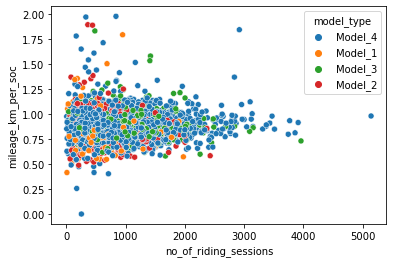

In [10]:
##Exploratory data analysis
#visualizing no of riding sessions and mileage to get insights
sns.scatterplot(data=df,x='no_of_riding_sessions',y='mileage_km_per_soc',hue='model_type')

In [11]:
#this 'no_of_riding_sessions' is a factor that has been used to determine the charging behaviour of the battery it has no direct effect on Mileage.

<AxesSubplot:xlabel='no_of_charging_sessions', ylabel='mileage_km_per_soc'>

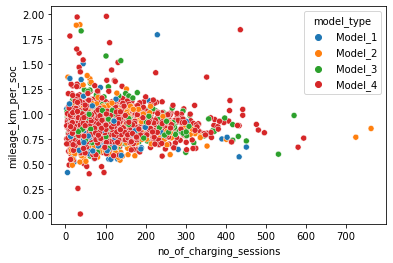

In [12]:
#visualizing no of charging sessions and mileage to get insights
sns.scatterplot(data=df,x='no_of_charging_sessions',y='mileage_km_per_soc',hue='model_type',hue_order=['Model_1','Model_2','Model_3','Model_4'])

In [13]:
#this 'no_of_charging_sessions' is a factor that has been used to determine the charging behaviour of the battery it has no direct effect on Mileage.

<AxesSubplot:xlabel='age_scaled', ylabel='mileage_km_per_soc'>

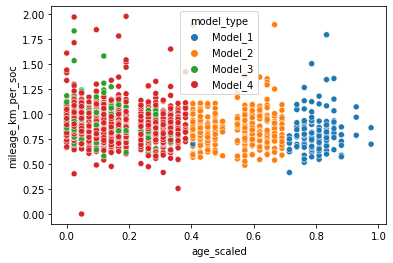

In [14]:
#visualizing age_scaled(age) and mileage to get insights
sns.scatterplot(data=df,x='age_scaled',y='mileage_km_per_soc',hue='model_type',hue_order=['Model_1','Model_2','Model_3','Model_4'])

In [15]:
###from this visual thr model 1 seems to be in use for a longer period of time, and then the others follows i.e.,
#the order of age of the models is as follows: model 1> model 2> model 3> model 4 and as of the mileage is considered,
#the mileage increases in newer models gradually and improvement can be clearly seen###


<AxesSubplot:xlabel='model_type', ylabel='mileage_km_per_soc'>

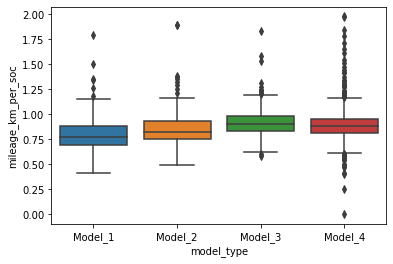

In [16]:
#visualizing model_type and mileage to get insights
sns.boxplot(data=df,x='model_type',y='mileage_km_per_soc',order=['Model_1','Model_2','Model_3','Model_4'])

In [17]:
#here in this comparison, it is clearly evident that, the mean mileage per soc is increasing, i.e., the battery efficiency is 
#being increased from model 1 to model 3 and as of model 4 is considered, the mean in slightly reduced but since it has a lot
#of outliers the performance is being increased in a notable number of bikes. It may be explaining that, a new type of battery 
#might have been used in some batches of bikes for testing.

<AxesSubplot:xlabel='charging_behavior', ylabel='mileage_km_per_soc'>

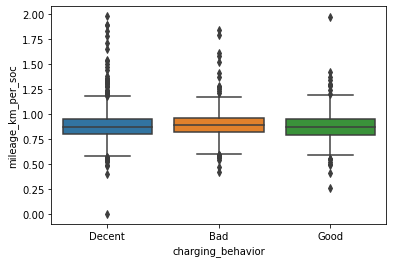

In [18]:
#visualizing charging behaviour of various models and mileage
sns.boxplot(data=df,x='charging_behavior',y='mileage_km_per_soc')

In [19]:
#here, from this visual it can be seen that, the charging behaviour doesn't have major effect.#therefore, the battery seems to be a good product as such the charging behaviour has rare impacts on mileage. but when outliers is 
#considered the decent charging behaviour seems to have better mileage in many cases.

<AxesSubplot:xlabel='charging_behavior', ylabel='mileage_km_per_soc'>

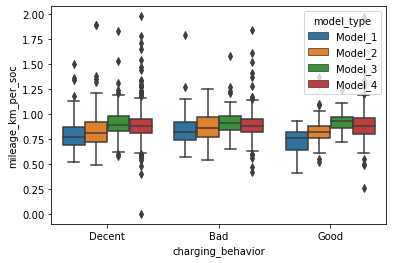

In [20]:
sns.boxplot(data=df,x='charging_behavior',y='mileage_km_per_soc',hue='model_type',hue_order=['Model_1','Model_2','Model_3','Model_4'])

In [21]:
#other than in model 3, where a slight affect on the mileage per soc is seen.
#therefore, the battery seems to be a good product as such the charging behaviour has rare impacts on mileage.

<AxesSubplot:>

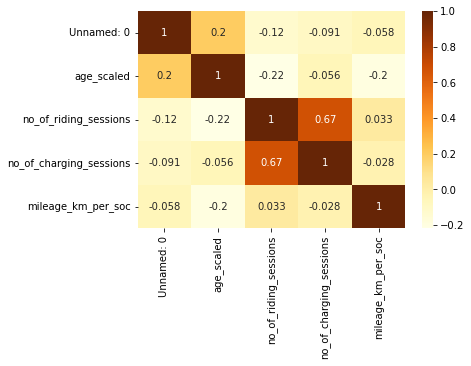

In [22]:
#creating a correlation table to study the correaltion between various data and how it has an impact over the mileage:
sns.heatmap(df.corr(),annot=True,cmap='YlOrBr')

In [23]:
#This heatmap clearly says about the correlation between various factors of mileage and mileage.

In [24]:
#importing sklearn libraries, that is used for models
from sklearn import preprocessing 
from sklearn.metrics import confusion_matrix, accuracy_score

In [25]:
#printing data types for creating model
print(df.dtypes)

Unnamed: 0                   int64
bike_id                     object
age_scaled                 float64
model_type                  object
no_of_riding_sessions        int64
no_of_charging_sessions      int64
charging_behavior           object
mileage_km_per_soc         float64
dtype: object


In [26]:
#seperating categorical data
df_cat = list(df.select_dtypes(include=['object']).columns)
print(df_cat)

['bike_id', 'model_type', 'charging_behavior']


In [27]:
#seperating numerical values and data
df_num = list(df.select_dtypes(include=['int64']).columns)
print(df_num)

['Unnamed: 0', 'no_of_riding_sessions', 'no_of_charging_sessions']


In [28]:
#converting all data to int or binary data type to create models
df = df.astype({"mileage_km_per_soc":'int', "age_scaled":'int'})

In [29]:
#converting all data to int or binary data type to create models
le = preprocessing.LabelEncoder()
for i in df_cat:
    df[i] = le.fit_transform(df[i])
print(df.dtypes)

Unnamed: 0                 int64
bike_id                    int32
age_scaled                 int32
model_type                 int32
no_of_riding_sessions      int64
no_of_charging_sessions    int64
charging_behavior          int32
mileage_km_per_soc         int32
dtype: object


In [30]:
#creating X and Y values for creating models:
X= df.drop(['mileage_km_per_soc','Unnamed: 0'],axis = 1)
Y = df['mileage_km_per_soc']
print(X)
print(Y)

      bike_id  age_scaled  model_type  no_of_riding_sessions  \
0        1235           0           3                    305   
1         167           0           3                    136   
2        1108           0           3                    209   
3        1284           0           3                    221   
4        2462           0           3                   1778   
...       ...         ...         ...                    ...   
2843     2523           0           3                      6   
2844     2063           0           3                   1537   
2845     2727           0           3                     80   
2846      311           0           0                   1141   
2847     1188           0           3                    636   

      no_of_charging_sessions  charging_behavior  
0                          59                  1  
1                          11                  1  
2                          90                  0  
3                          

In [31]:
#creating a train test split of 20-80 proportion to train the data for model creation:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=1)

In [32]:
#checking the split occured by printing the shape:
print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

(2278, 6) (2278,) (570, 6) (570,)


In [33]:
#standardizing the data:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [34]:
#creating a logistic regression model:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)
log.fit(x_train, y_train)
log_pred = log.predict(x_test)
ac_log = round(accuracy_score(y_test, log_pred)*100,2)
cm_log = confusion_matrix(y_test, log_pred)
print(ac_log)

84.56


In [35]:
#creating a Knn model and used trail and error for choosing the n_neighbors value:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
ac_knn = round(accuracy_score(y_test, knn_pred)*100,2)
cm_knn = confusion_matrix(y_test, knn_pred)
print(ac_knn)

83.51


In [36]:
#creating a sgd model:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
sgd_pred = sgd.predict(x_test)
ac_sgd = round(accuracy_score(y_test, sgd_pred)*100,2)
cm_sgd = confusion_matrix(y_test, sgd_pred)
print(ac_sgd)

84.56


In [37]:
#creating a Decision tree model:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(max_depth=4)
dct.fit(x_train,y_train)
dct_pred = dct.predict(x_test)
ac_dct = round(accuracy_score(y_test, dct_pred)*100,2)
cm_dct = confusion_matrix(y_test, dct_pred)
print(ac_dct)

84.56


#creating a Decision tree model:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(max_depth=4)
dct.fit(x_train,y_train)
dct_pred = dct.predict(x_test)
ac_dct = round(accuracy_score(y_test, dct_pred)*100,2)
cm_dct = confusion_matrix(y_test, dct_pred)
print(ac_dct)

In [38]:
#creating a Random Forest model:
from sklearn.ensemble import RandomForestClassifier
rd = RandomForestClassifier(min_samples_leaf=0.12)
rd.fit(x_train,y_train)
rd_pred = rd.predict(x_test)
ac_rd = round(accuracy_score(y_test, rd_pred)*100,2)
cm_rd = confusion_matrix(y_test, rd_pred)
print(ac_rd)

84.56


In [39]:
#printing the data along with confusion matrix to choose the model that has the maximum accuracy:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Stochastic Gradient Decent','Decision Tree','Random Forest',  
              'KNN'],
    'Accuracy': [ac_log,ac_sgd,ac_dct,ac_rd,ac_knn],
    'Confusion_Matrix':[cm_log,cm_sgd,cm_dct,cm_rd,cm_knn]})                
result_df = results.sort_values(by='Accuracy', ascending=False)
result_df = result_df.set_index('Model')
result_df.head(5)

,Accuracy,Confusion_Matrix
Model,,
Logistic Regression,84.56,"[[482, 0], [88, 0]]"
Stochastic Gradient Decent,84.56,"[[482, 0], [88, 0]]"
Decision Tree,84.56,"[[482, 0], [88, 0]]"
Random Forest,84.56,"[[482, 0], [88, 0]]"
KNN,83.51,"[[476, 6], [88, 0]]"


In [40]:
#logistic regression models seems to be more accurate